In [1]:
#import necessary libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk

In [2]:
pd.set_option("display.max_columns",None)

In [3]:
#Load dataset
df = pd.read_csv("/content/Titanic.csv")

In [4]:
print(df.head())

                                            Name PClass    Age     Sex  \
0                   Allen, Miss Elisabeth Walton    1st  29.00  female   
1                    Allison, Miss Helen Loraine    1st   2.00  female   
2            Allison, Mr Hudson Joshua Creighton    1st  30.00    male   
3  Allison, Mrs Hudson JC (Bessie Waldo Daniels)    1st  25.00  female   
4                  Allison, Master Hudson Trevor    1st   0.92    male   

   Survived  
0         1  
1         0  
2         0  
3         0  
4         1  


In [5]:
#handling missing values
df.isnull().sum()

Name          0
PClass        1
Age         557
Sex           0
Survived      0
dtype: int64

We can understand that we have maximum null values in the age column, i.e, 557 values are null. 1 null value can also be seen in the PClasss column.

In [6]:
df.describe()

,Age,Survived
count,756.000000,1313.000000
mean,30.397989,0.342727
std,14.259049,0.474802
min,0.170000,0.000000
25%,21.000000,0.000000
50%,28.000000,0.000000
75%,39.000000,1.000000
max,71.000000,1.000000


Statistical Information of categorical/numerical columns can be seen using df.desribe function.
Here the columns carrying Numerical data are Age and Survuvived.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1313 entries, 0 to 1312
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      1313 non-null   object 
 1   PClass    1312 non-null   object 
 2   Age       756 non-null    float64
 3   Sex       1313 non-null   object 
 4   Survived  1313 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 51.4+ KB


In [8]:
df.dtypes

Name         object
PClass       object
Age         float64
Sex          object
Survived      int64
dtype: object

Data Type of all the present columns in the dataset can be understood using df.dtpes method.

In [9]:
#printing only particular columns
df['PClass']

0       1st
1       1st
2       1st
3       1st
4       1st
       ... 
1308    3rd
1309    3rd
1310    3rd
1311    3rd
1312    3rd
Name: PClass, Length: 1313, dtype: object

In [10]:
#Uniue values in a particular column
df['PClass'].nunique()

3

In [11]:
df['PClass'].unique()

array(['1st', '2nd', nan, '3rd'], dtype=object)

Three unique values for the class of the passenger (1st, 2nd and 3rd) can be seen for the travellers in the Titanic.  

In [12]:
df["Sex"].nunique()

2

In [13]:
df['Sex'].unique()

array(['female', 'male'], dtype=object)

In [14]:
df['Survived'].nunique()

2

In [15]:
df['Survived'].unique()

array([1, 0])

Two unique values (1,0) can be found in the Survived column, indicating the survival of the passenger (1) or if the passenger couldn't survive(0)

In [16]:
#Handling Age Column

We saw a lot of null values in the age column and thus it is necessary to handle the null values and other disperancies in the age column.

<Axes: ylabel='Age'>

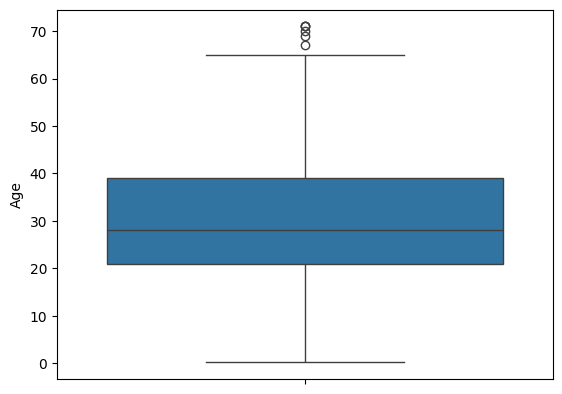

In [17]:
sns.boxplot(df["Age"])

In [18]:
#Outlier detection
##IQR(Inter Quartile Range)
Q1 = np.percentile(df['Age'], 25, axis = 0)
Q3 = np.percentile(df['Age'], 75, axis = 0)

IQR = Q3 - Q1

outliers1 = ((df['Age'] < (Q1 - 1.5* IQR)) | (df['Age'] > (Q3 + 1.5*IQR)))

print("Indices of Outliers: ", np.where(outliers1))

Indices of Outliers:  (array([], dtype=int64),)


It indicates that there are no outliers in the dataset because the array is empty. This means that no values in the 'Age' column fall outside the range defined by Q1 - 1.5 * IQR and Q3 + 1.5 * IQR.

In [19]:
#Handling Missing Value
df['Age'] = df['Age'].replace(np.NaN,df['Age'].mean())

#replacing null values with computed mean of age column

In [20]:
df['Age'].mean()

30.397989417989425

In [21]:
#checking again for null values
df['Age'].isnull().sum()

0

In [22]:
#Handling missing values in PClass
df.dropna(axis = 0, inplace = True)

In [23]:
df.isnull().sum()

Name        0
PClass      0
Age         0
Sex         0
Survived    0
dtype: int64

Now, the missing values have been handled.
The missing values in the age column have been replaced by the Computed mean whereas the one missing value present in the PClass column have been dropped.

In [24]:
#Changing categorical data into numerical data

Now, we'll convert categorical data in the dataset such as the one present in Sex olumn into numerical data for better analysis. Label Encoder or Get Dummies can be used for the same.


In [25]:
df['Sex'].unique()

array(['female', 'male'], dtype=object)

In [26]:
df['Sex'].head()

0    female
1    female
2      male
3    female
4      male
Name: Sex, dtype: object

In [27]:
# Import label encoder
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

Label Encoding is a technique that is used to convert categorical columns into numerical ones so that they can be fitted by machine learning models which only take numerical data.

In [28]:
df['Sex'] = label_encoder.fit_transform(df['Sex'])

In [29]:
df['Sex'].unique()

array([0, 1])

In [30]:
df["Sex"].head()

0    0
1    0
2    1
3    0
4    1
Name: Sex, dtype: int64

Here, male category is now represented by 1 and females by 0.

In [31]:
#Changing labels for PClass Column

In [32]:
df['PClass'].unique()

array(['1st', '2nd', '3rd'], dtype=object)

In [33]:
df['PClass'] = label_encoder.fit_transform(df['PClass'])

In [34]:
df['PClass'].unique()

array([0, 1, 2])

The PClass categories 1st, 2nd and 3rd are now represented as 0, 1, 2 respectively.

In [35]:
##VISUALIZATION

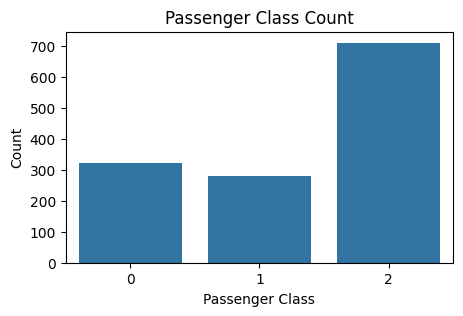

In [36]:
#Countplot for PClass Column
plt.figure(figsize=(5,3))                      #setting figure size
sns.countplot(x = df['PClass'], data = df)
plt.xlabel("Passenger Class")                  #set x-axis label
plt.ylabel("Count")                            #set y-axis label
plt.title("Passenger Class Count")             #set title
plt.show()

Maximum Passengers present had the categorization of 3rd PClass (2 as per Label Encoder)

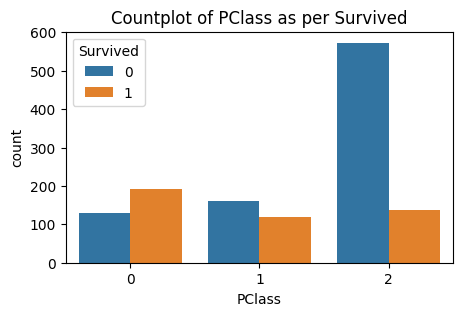

In [37]:
#Countplot of Passenger class with respect to survival
plt.figure(figsize=(5,3))
sns.countplot(x=df['PClass'], hue = df['Survived'], data = df)
plt.title("Countplot of PClass as per Survived")
plt.show()

The graph shows the distribution of survived passengers from each pasenger class.

We can visualize that a lot of passengers from 3rd Passenger Class(2) couldn't survive. From 1st passenger Class(0) approximately 190 out of 300 survived similarly from 2nd passenger class (1) approximately 120 out of 280 passengers survived, however, from 3rd passenger class (2) from an approximation of 700 passengrs only an approximate of 120 could survive.

This shows that the higher class passengers had more survival rate than the lower class passengers in the Titanic incident.


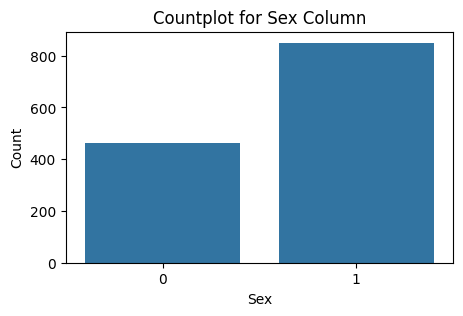

In [38]:
#Countplot for Sex Column
plt.figure(figsize=(5,3))
sns.countplot(x=df['Sex'], data=df)
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Countplot for Sex Column')
plt.show()

We can see that approximately 410 females(0) and 805 males(1) were present in the Titanic.

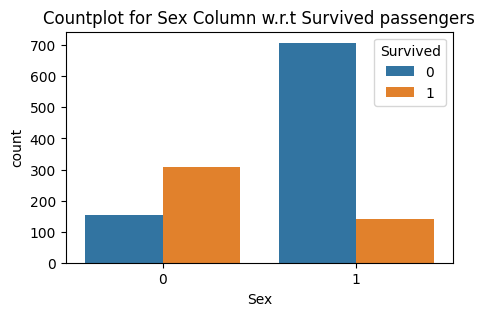

In [39]:
#Countplot of sex w.r.t survived
#Countplot for Sex Column
plt.figure(figsize=(5,3))
sns.countplot(x=df['Sex'], hue=df['Survived'], data=df)
plt.title('Countplot for Sex Column w.r.t Survived passengers')
plt.show()

We can see that from an approximation of about 410 females(0) about 300 survived but from an approximation of 805 males(1) only about 105 survived.


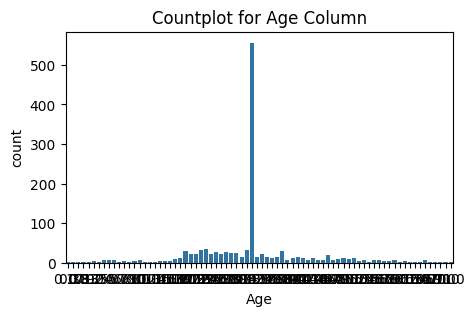

In [40]:
#Countplot for Age Column
plt.figure(figsize=(5,3))
sns.countplot(x=df['Age'], data=df)
plt.title('Countplot for Age Column')
plt.xlabel('Age')
plt.show()

With a vast data such as the same in age clumn countplot, is not giving a great visualisation therefore other methods for visualizing the same can be considered.

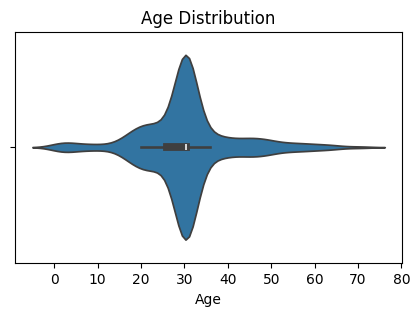

In [41]:
#Violin Plot
plt.figure(figsize=(5,3))
sns.violinplot(data=df, x=df['Age'])
plt.title('Age Distribution')
plt.show()

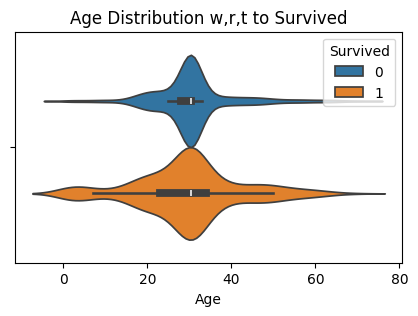

In [42]:
#Violin Plot
plt.figure(figsize=(5,3))
sns.violinplot(data=df, x=df['Age'], hue=df['Survived'])
plt.title('Age Distribution w,r,t to Survived')
plt.show()

From the age analysis we can see the that people in the age of 10-45 had the maximum survival rate.

<Axes: xlabel='Sex', ylabel='Age'>

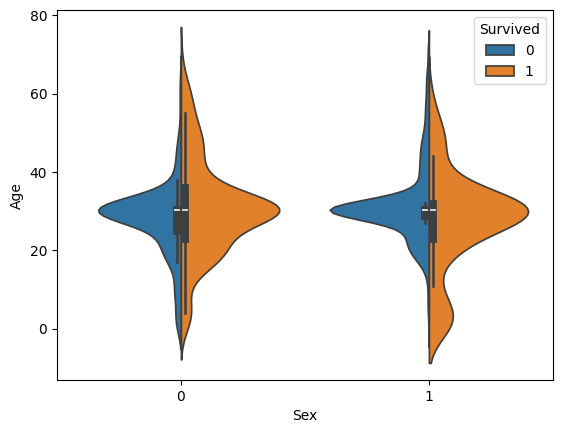

In [43]:
sns.violinplot(x ="Sex", y ="Age", hue ="Survived",
data = df, split = True)

With all the visualization we can say that the best survival rate was among:
1. Higher Class Passengers
2. Women
3. People in the age group of 10-45

In [44]:
#Dividing the age column into age groups

# Define the bins for the age groups
bins = [0, 10, 45, float('inf')]
labels = ['0-10', '10-45', '45+']

# Create a new column 'AgeGroup' in the dataframe with the age categories
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Display the first few rows to check the new column
print(df.head())


                                            Name  PClass    Age  Sex  \
0                   Allen, Miss Elisabeth Walton       0  29.00    0   
1                    Allison, Miss Helen Loraine       0   2.00    0   
2            Allison, Mr Hudson Joshua Creighton       0  30.00    1   
3  Allison, Mrs Hudson JC (Bessie Waldo Daniels)       0  25.00    0   
4                  Allison, Master Hudson Trevor       0   0.92    1   

   Survived AgeGroup  
0         1    10-45  
1         0     0-10  
2         0    10-45  
3         0    10-45  
4         1     0-10  


<Axes: xlabel='AgeGroup', ylabel='count'>

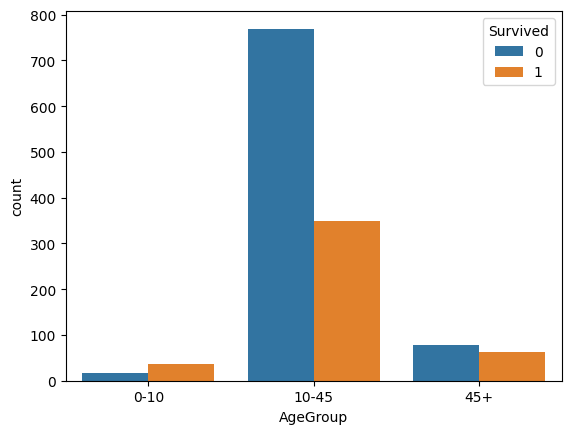

In [46]:
#Survival rate among different age groups
sns.countplot(x='AgeGroup', hue='Survived', data=df)

The Plot confirms that the maximum survival among age group of 10-45 has been present.

To work further, now a prediction on the survival will be done, using classification algorithm.

In [47]:
df.columns

Index(['Name', 'PClass', 'Age', 'Sex', 'Survived', 'AgeGroup'], dtype='object')

In [48]:
df.nunique()

Name        1309
PClass         3
Age           76
Sex            2
Survived       2
AgeGroup       3
dtype: int64

Name being the column with all the null values will be dropped before the classification.

In [49]:
df.drop("Name", axis=1, inplace=True)

In [50]:
df.columns

Index(['PClass', 'Age', 'Sex', 'Survived', 'AgeGroup'], dtype='object')

In the Titanic dataset, we have features [PClass, Age, Sex, AgeGroup] the goal is to predict whether the passenger survived or not. Thus we have Input Variables and Label as well.

Sine, we have label present, supervised learning techniques will be used for the classificiaction.

In [51]:
X = df.drop("Survived", axis=1)
y = df['Survived']

In [52]:
X.drop("AgeGroup", axis=1, inplace=True)

In [53]:
print(X)

      PClass    Age  Sex
0          0  29.00    0
1          0   2.00    0
2          0  30.00    1
3          0  25.00    0
4          0   0.92    1
...      ...    ...  ...
1308       2  27.00    1
1309       2  26.00    1
1310       2  22.00    1
1311       2  24.00    1
1312       2  29.00    1

[1312 rows x 3 columns]


In [54]:
# Initialize and fit scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [55]:
print(y)

0       1
1       0
2       0
3       0
4       1
       ..
1308    0
1309    0
1310    0
1311    0
1312    0
Name: Survived, Length: 1312, dtype: int64


The dataset is now divided into X and y, the X subset includes all the input variables that are to be used for prediction.
The y subset includes the label/output variable, i.e, Survived.

The data will be divided into train and test using train_test_split function from the sklearn.model_selection library

X_train, y_train data subsets will be used for the training data whereas the subsets X_test, y_test will be sued for getting the predictions.

In [56]:
print(X.shape)
print(y.shape)

(1312, 3)
(1312,)


In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [58]:
# Check shapes
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')

X_train shape: (918, 3)
y_train shape: (918,)


In [59]:
#KNN

For classification we'll use KNN algorithm. KNN being the simplest classification model studies the similarity between the new data and the already present data, and assigns the data to the category similar to it's nearest neighbor

In [60]:
from sklearn.neighbors import KNeighborsClassifier #function to import KNN
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

knn = KNeighborsClassifier(n_neighbors=5) #classifier

In [61]:
#model
knn_model = knn.fit(X_train, y_train)

In [62]:
# Make predictions on the test set
y_pred_knn = knn.predict(X_test)

In [63]:
print(y_pred_knn)

[1 1 0 1 1 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 1
 1 1 1 1 0 1 1 0 0 0 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0
 1 0 1 1 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0
 1 1 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 0 0 1 1 0 0 1 0 1 0
 0 1 1 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 1 1 1 0 0 0 1 1 0 0 0 1 1 1 1 0 1 1
 0 0 0 0 1 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0
 0 1 0 1 0 1 0 0 1 1 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 1
 0 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 0 0 1 0 1 1
 0 0 0 0 0 0 0 1 1 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 1 1
 0 1 1 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 0 0
 1 0 0 1 0 0 1 0 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0]


In [64]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_knn)
print(f'Accuracy: {accuracy:.2f}')

# Print classification report
print('Classification Report:')
print(classification_report(y_test, y_pred_knn))

# Print confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_knn))

Accuracy: 0.77
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.83      0.81       243
           1       0.71      0.67      0.69       151

    accuracy                           0.77       394
   macro avg       0.75      0.75      0.75       394
weighted avg       0.76      0.77      0.77       394

Confusion Matrix:
[[201  42]
 [ 50 101]]


In [65]:
#Naive Bayes

In [66]:
from sklearn.naive_bayes import GaussianNB #fnc of Naive Bayes

In [67]:
#Initialise model
nb = GaussianNB()

#Fit Model
nb.fit(X_train, y_train)

GaussianNB()

In [68]:
# Make predictions on the test data
y_pred_nb = nb.predict(X_test)

In [69]:
print(y_pred_nb)

[1 1 0 1 1 0 1 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0
 0 0 1 1 0 1 1 0 0 0 1 1 1 0 0 1 0 0 1 1 1 0 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0
 1 0 1 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0
 1 1 1 1 1 0 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 0 1 1 1 1 0 1 0 1 1
 0 1 1 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 0 1 1
 1 0 1 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 1 1 0 0 1 1 1
 0 1 0 0 0 1 0 0 1 1 0 1 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 0
 1 0 0 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 0 1 1 0 1 1
 1 0 0 1 0 0 0 1 1 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 1 1
 0 1 1 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1
 1 0 0 1 1 0 1 0 1 1 0 1 0 1 0 0 0 1 0 1 1 1 0 0]


In [70]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_nb)
print(f"Model Accuracy: {accuracy:.2f}")

# Print classification report
print('Classification Report:')
print(classification_report(y_test, y_pred_nb))

# Print confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_nb))

Model Accuracy: 0.75
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.77      0.79       243
           1       0.66      0.70      0.68       151

    accuracy                           0.75       394
   macro avg       0.73      0.74      0.73       394
weighted avg       0.75      0.75      0.75       394

Confusion Matrix:
[[188  55]
 [ 45 106]]


In [71]:
#Decision Tree

In [72]:
from sklearn.tree import DecisionTreeClassifier

In [73]:
#Initialise Model
decision_tree = DecisionTreeClassifier(random_state= 42)

#Fit Model
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [74]:
#Predictions on test data
y_pred_dt = decision_tree.predict(X_test)

In [75]:
print(y_pred_dt)

[0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1
 1 0 1 1 0 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 1 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0
 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 1 1 0 0 1 0 1 0
 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 0 0 1 1 1 1 0 1 0
 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0
 0 1 0 1 0 1 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1
 0 0 1 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 0 0 0 0 1 1
 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0
 1 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0
 1 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 1 1 1 0 0]


In [76]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_dt)
print(f"Model Accuracy: {accuracy:.2f}")

# Print classification report
print('Classification Report:')
print(classification_report(y_test, y_pred_dt))

# Print confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_dt))

Model Accuracy: 0.80
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.93      0.85       243
           1       0.84      0.60      0.70       151

    accuracy                           0.80       394
   macro avg       0.82      0.77      0.78       394
weighted avg       0.81      0.80      0.80       394

Confusion Matrix:
[[226  17]
 [ 60  91]]


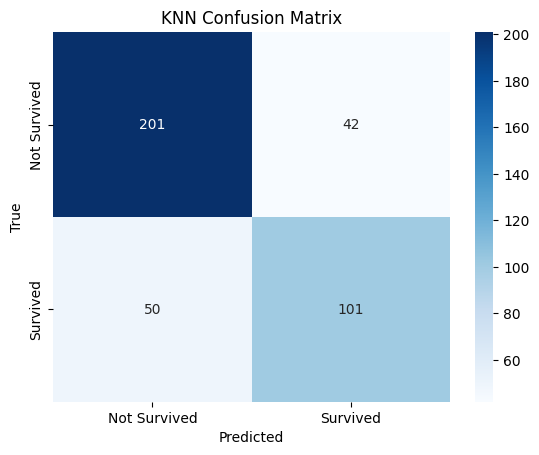

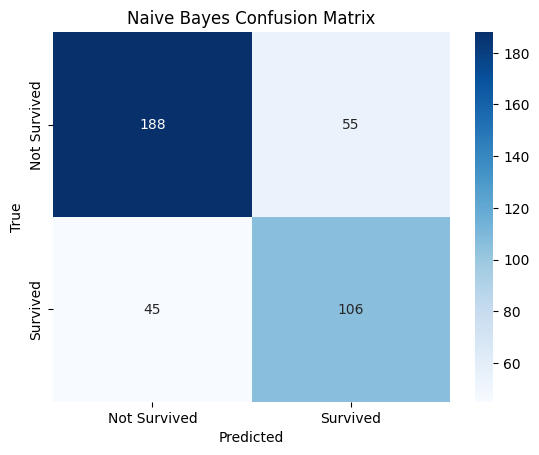

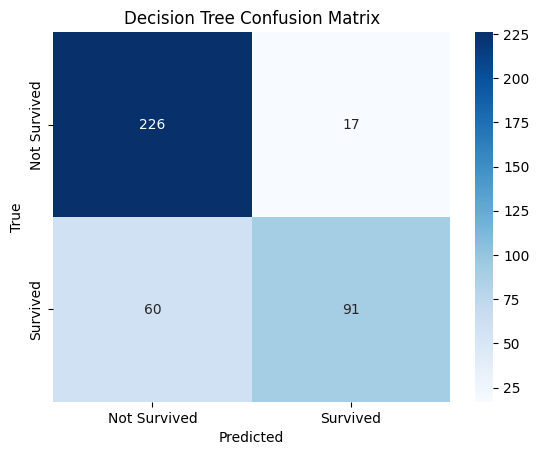

In [77]:
#Visualizing the Prediction done by different models
#Confusion Matrix
def plot_confusion_matrix(y_test, y_pred, title):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Survived", "Survived"], yticklabels=["Not Survived", "Survived"])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(title)
    plt.show()

plot_confusion_matrix(y_test, y_pred_knn, title="KNN Confusion Matrix")
plot_confusion_matrix(y_test, y_pred_nb, title="Naive Bayes Confusion Matrix")
plot_confusion_matrix(y_test, y_pred_dt, title="Decision Tree Confusion Matrix")


<ipython-input-78-7a1761d4b4bc>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracies, palette="viridis")


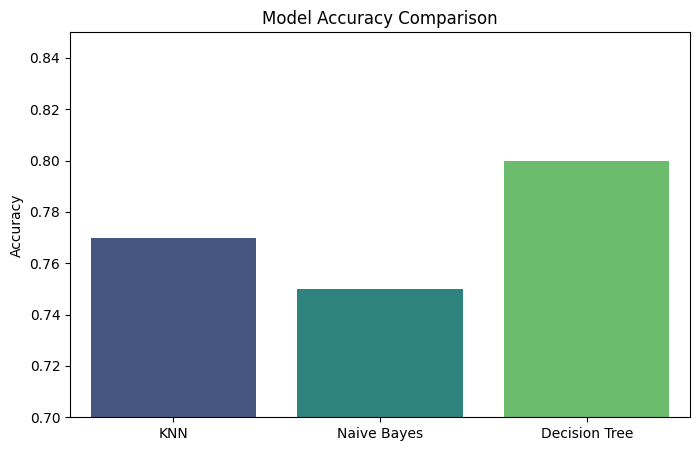

In [78]:
#Accuracy
models = ['KNN', 'Naive Bayes', 'Decision Tree']
accuracies = [0.77, 0.75, 0.80]

plt.figure(figsize=(8, 5))
sns.barplot(x=models, y=accuracies, palette="viridis")
plt.ylim(0.7, 0.85)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.show()